In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'AppleGothic'  # 맥OS 사용자
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


from utils.calculate_score import calculate_score
from check_franchise import check_franchise_list

In [15]:
ver = 4
location = "성수동"
keyword = "맛집"

In [16]:

crawled_data = pd.read_csv(
    f"data/crawl_result/{location}{keyword}.csv", header=0, encoding='utf-8')
crawled_data.reset_index(drop=True, inplace=True)

# NaN값 수정
columns_to_zero = ['instagram_post', 'instagram_follower',
                    'visitor_review_count', 'blog_review_count', 'distance_from_subway']
columns_to_false = ['age-2030', 'gender-balance']
for column in columns_to_zero:
    crawled_data[column].fillna("0", inplace=True)
for column in columns_to_false:
    crawled_data[column].fillna(False, inplace=True)

# 인스타그램 링크가 없는 경우, 점수 산출에서 제외
# crawled_data = crawled_data.loc[crawled_data['instagram_link'].notna(
# ) & crawled_data['instagram_link'].ne('')]
crawled_data.reset_index(drop=True, inplace=True)

franchise_check = pd.Series(check_franchise_list(crawled_data))
crawled_data = crawled_data[~franchise_check]

store_scores = pd.DataFrame(columns=["Naver ID", "Name", "Score"])

for index, item in crawled_data.iterrows():
    score = calculate_score(item)
    result = pd.DataFrame({"Naver ID": [item["store_id"]], "Name": [
                            item["name"]], "Score": [score]})
    store_scores = pd.concat([store_scores, result], ignore_index=True)

store_scores.sort_values(by="Score", ascending=False,
                            ignore_index=True, inplace=True)
store_scores_top20 = store_scores.head(20)


/var/folders/dl/_kvv4hhd1qb_h0ms_8jm1nkc0000gn/T/ipykernel_34781/2753227533.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  crawled_data[column].fillna("0", inplace=True)


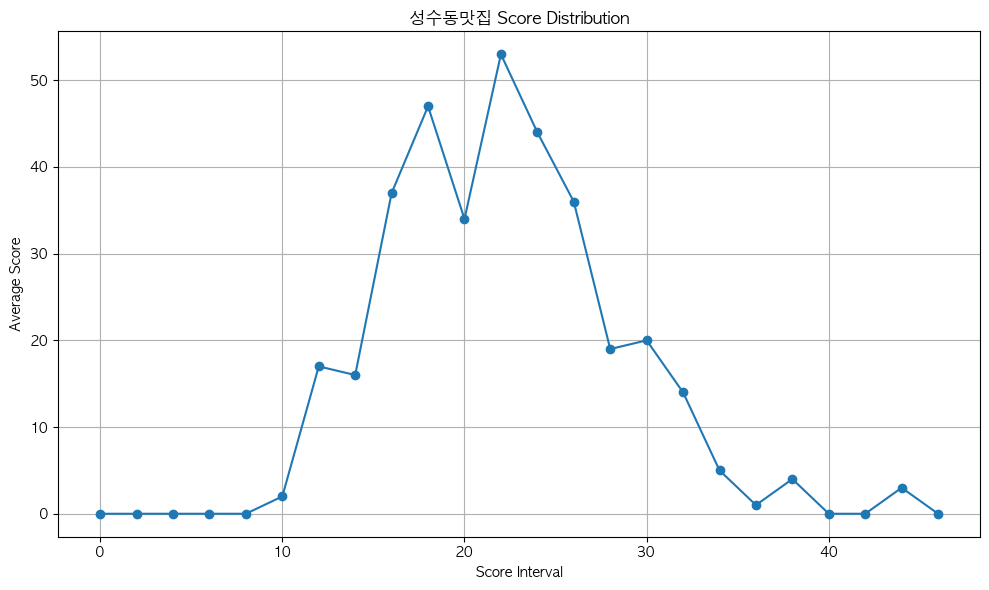

In [17]:
store_scores['Score Interval'] = pd.cut(store_scores['Score'], bins=np.arange(0, 50, 2), right=False, labels=np.arange(0, 48, 2))

plt.figure(figsize=(10, 6))
plt.plot(store_scores['Score Interval'].value_counts().sort_index(), marker='o')

plt.title(f"{location}{keyword} Score Distribution")
plt.xlabel("Score Interval")
plt.ylabel("Average Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
store_scores_top20

,Naver ID,Name,Score
0,12077060,아이해브어드림 강남역 본점,43
1,20472120,도치피자 강남,43
2,450731592,비어룸,41
3,21339789,카페마마스 강남역점,40
4,254053959,나폴리회관 강남역점,39
5,870437247,진대감 강남역 삼성타운점,37
6,34016603,알베르,37
7,37362104,바게트케이,36
8,20123101,아실라,35
9,20561475,브라운홀릭,34


In [19]:
store_scores_top20.to_csv(f'data/crawl_score/{location}{keyword}_top20_{ver}.csv', encoding='utf-8-sig')
# store_scores.to_csv(f'data/crawl_score/{location}{keyword}_score.csv', encoding='utf-8-sig')

# merged_data = pd.merge(crawled_data, store_scores, left_on='store_id', right_on='Naver ID',
#                        how='inner', suffixes=('', '_new'))

# merged_data.sort_values(by="Score", ascending=False,
#                         ignore_index=True, inplace=True)

# merged_data.to_csv(f'data/crawl_score/{keyword}_crawl_score.csv')